# TASK 7 STOCK PREDICTION

In [35]:
import numpy as np 
import pandas as pd
!pip install yfinance
!pip install textblob
!pip install xgboost
import yfinance as yf
from matplotlib import pyplot as plt
from  sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob
import xgboost as xgb

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1125)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1125)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SS

In [65]:
stock_data = yf.download("^BSESN",start="2012-11-11",end="2022-11-11")
news_data = pd.read_csv("india-news-headlines.csv")

[*********************100%%**********************]  1 of 1 completed


In [66]:
stock_data.to_csv("stock_data.csv")

In [67]:
stock_data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-11-12,18691.019531,18750.919922,18607.660156,18670.339844,18670.339844,19400
2012-11-15,18590.070312,18593.539062,18408.689453,18471.369141,18471.369141,6200
2012-11-16,18491.490234,18563.320312,18266.759766,18309.369141,18309.369141,7000
2012-11-19,18349.529297,18386.779297,18256.070312,18339.000000,18339.000000,7200
2012-11-20,18422.689453,18467.910156,18255.689453,18329.320312,18329.320312,6600
...,...,...,...,...,...,...
2022-11-03,60511.570312,60994.371094,60485.140625,60836.410156,60836.410156,25000
2022-11-04,60698.269531,61004.488281,60666.011719,60950.359375,60950.359375,13600
2022-11-07,61188.128906,61401.539062,60714.359375,61185.148438,61185.148438,17000


In [39]:
news_data



,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,20220331,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,20220331,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,20220331,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,20220331,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [40]:
news_data["publish_date"]= pd.to_datetime(news_data['publish_date'],format="%Y%m%d")

In [41]:
news_data

,publish_date,headline_category,headline_text
0,2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2,2001-01-02,unknown,America's unwanted heading for India?
3,2001-01-02,unknown,For bigwigs; it is destination Goa
4,2001-01-02,unknown,Extra buses to clear tourist traffic
...,...,...,...
3650965,2022-03-31,city.srinagar,J&K sacks 2 cops; 3 other employees over terro...
3650966,2022-03-31,entertainment.hindi.bollywood,Ranbir Kapoor says 'Rishi Kapoor enjoyed his a...
3650967,2022-03-31,city.trichy,As Covid-19 cases drop to nil in southern dist...
3650968,2022-03-31,city.erode,Tamil Nadu sees marginal rise of Covid cases w...


In [68]:
stock_data.reset_index(inplace=True)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-11-12,18691.019531,18750.919922,18607.660156,18670.339844,18670.339844,19400
1,2012-11-15,18590.070312,18593.539062,18408.689453,18471.369141,18471.369141,6200
2,2012-11-16,18491.490234,18563.320312,18266.759766,18309.369141,18309.369141,7000
3,2012-11-19,18349.529297,18386.779297,18256.070312,18339.000000,18339.000000,7200
4,2012-11-20,18422.689453,18467.910156,18255.689453,18329.320312,18329.320312,6600
...,...,...,...,...,...,...,...
2447,2022-11-03,60511.570312,60994.371094,60485.140625,60836.410156,60836.410156,25000
2448,2022-11-04,60698.269531,61004.488281,60666.011719,60950.359375,60950.359375,13600
2449,2022-11-07,61188.128906,61401.539062,60714.359375,61185.148438,61185.148438,17000
2450,2022-11-09,61304.289062,61447.230469,60905.148438,61033.550781,61033.550781,9100


In [43]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       0 non-null      object 
 1   Open       0 non-null      float64
 2   High       0 non-null      float64
 3   Low        0 non-null      float64
 4   Close      0 non-null      float64
 5   Adj Close  0 non-null      float64
 6   Volume     0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 124.0+ bytes


In [44]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   publish_date       datetime64[ns]
 1   headline_category  object        
 2   headline_text      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 83.6+ MB


Sentiment Analysis From News Headlines

In [45]:
news_data["sentiment"]= news_data["headline_text"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [46]:
average_sentiment = news_data.groupby("publish_date")["sentiment"].mean().reset_index()

In [47]:
average_sentiment

,publish_date,sentiment
0,2001-01-02,0.042829
1,2001-01-03,0.011280
2,2001-01-04,0.038048
3,2001-01-05,0.141441
4,2001-01-06,0.128030
...,...,...
7712,2022-03-27,0.009895
7713,2022-03-28,0.026582
7714,2022-03-29,0.038279
7715,2022-03-30,0.013004


In [48]:
average_sentiment.rename(columns = {"publish_date":"date"},inplace=True)
average_sentiment

,date,sentiment
0,2001-01-02,0.042829
1,2001-01-03,0.011280
2,2001-01-04,0.038048
3,2001-01-05,0.141441
4,2001-01-06,0.128030
...,...,...
7712,2022-03-27,0.009895
7713,2022-03-28,0.026582
7714,2022-03-29,0.038279
7715,2022-03-30,0.013004


Merging Stock And News Dataset

In [69]:
stock_data.rename(columns = {"Date":"date"},inplace=True)

In [70]:
merged_data=pd.merge(stock_data,average_sentiment,how="left",on="date")

In [71]:
merged_data

,date,Open,High,Low,Close,Adj Close,Volume,sentiment
0,2012-11-12,18691.019531,18750.919922,18607.660156,18670.339844,18670.339844,19400,0.022515
1,2012-11-15,18590.070312,18593.539062,18408.689453,18471.369141,18471.369141,6200,0.016582
2,2012-11-16,18491.490234,18563.320312,18266.759766,18309.369141,18309.369141,7000,0.029286
3,2012-11-19,18349.529297,18386.779297,18256.070312,18339.000000,18339.000000,7200,0.034760
4,2012-11-20,18422.689453,18467.910156,18255.689453,18329.320312,18329.320312,6600,0.017335
...,...,...,...,...,...,...,...,...
2447,2022-11-03,60511.570312,60994.371094,60485.140625,60836.410156,60836.410156,25000,NaN
2448,2022-11-04,60698.269531,61004.488281,60666.011719,60950.359375,60950.359375,13600,NaN
2449,2022-11-07,61188.128906,61401.539062,60714.359375,61185.148438,61185.148438,17000,NaN
2450,2022-11-09,61304.289062,61447.230469,60905.148438,61033.550781,61033.550781,9100,NaN


Creating New Features(Feature Engg.)


In [72]:
merged_data["M10"]=merged_data["Close"].rolling(window=10).mean()
merged_data["M20"]=merged_data["Close"].rolling(window=20).mean()
merged_data["M30"]=merged_data["Close"].rolling(window=30).mean()
merged_data["daily_return"]=merged_data["Close"].pct_change()
merged_data["volatility"]=merged_data["daily_return"].rolling(window=10).std()

In [73]:
merged_data

,date,Open,High,Low,Close,Adj Close,Volume,sentiment,M10,M20,M30,daily_return,volatility
0,2012-11-12,18691.019531,18750.919922,18607.660156,18670.339844,18670.339844,19400,0.022515,NaN,NaN,NaN,NaN,NaN
1,2012-11-15,18590.070312,18593.539062,18408.689453,18471.369141,18471.369141,6200,0.016582,NaN,NaN,NaN,-0.010657,NaN
2,2012-11-16,18491.490234,18563.320312,18266.759766,18309.369141,18309.369141,7000,0.029286,NaN,NaN,NaN,-0.008770,NaN
3,2012-11-19,18349.529297,18386.779297,18256.070312,18339.000000,18339.000000,7200,0.034760,NaN,NaN,NaN,0.001618,NaN
4,2012-11-20,18422.689453,18467.910156,18255.689453,18329.320312,18329.320312,6600,0.017335,NaN,NaN,NaN,-0.000528,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,2022-11-03,60511.570312,60994.371094,60485.140625,60836.410156,60836.410156,25000,NaN,60121.280078,59101.230078,58608.073438,-0.001144,0.005489
2448,2022-11-04,60698.269531,61004.488281,60666.011719,60950.359375,60950.359375,13600,NaN,60296.026172,59237.642969,58657.859375,0.001873,0.005483
2449,2022-11-07,61188.128906,61401.539062,60714.359375,61185.148438,61185.148438,17000,NaN,60483.826172,59387.335938,58726.707031,0.003852,0.005473
2450,2022-11-09,61304.289062,61447.230469,60905.148438,61033.550781,61033.550781,9100,NaN,60604.015234,59539.458008,58824.527995,-0.002478,0.005330


In [74]:
merged_data.dropna(inplace=True)
merged_data


,date,Open,High,Low,Close,Adj Close,Volume,sentiment,M10,M20,M30,daily_return,volatility
29,2012-12-27,19479.839844,19504.400391,19302.210938,19323.800781,19323.800781,7600,0.009517,19332.395117,19347.152539,19064.194336,-0.004824,0.006361
30,2012-12-28,19364.080078,19465.740234,19346.070312,19444.839844,19444.839844,6600,0.028275,19353.953125,19360.849023,19090.011003,0.006264,0.006222
31,2012-12-31,19422.589844,19491.580078,19406.169922,19426.710938,19426.710938,4800,0.047165,19364.899219,19365.189551,19121.855729,-0.000932,0.006127
32,2013-01-02,19693.300781,19756.679688,19686.500000,19714.240234,19714.240234,7400,0.031589,19411.881250,19385.635547,19168.684766,0.014801,0.007353
33,2013-01-03,19771.029297,19786.300781,19693.289062,19764.779297,19764.779297,6600,0.016653,19451.884180,19406.468555,19216.210742,0.002564,0.007232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900,-0.005526,57041.823828,55916.894727,56530.090885,-0.004054,0.012041
2297,2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300,0.026582,57246.142578,56070.073633,56485.672786,0.004032,0.012023
2298,2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100,0.038279,57391.905469,56174.330078,56478.697005,0.006080,0.011166
2299,2022-03-30,58362.851562,58727.781250,58176.000000,58683.988281,58683.988281,6300,0.013004,57682.619141,56296.165430,56554.635286,0.012777,0.010173


In [75]:
merged_data.reset_index(inplace=True)
merged_data.drop(columns='index',inplace=True)
merged_data

,date,Open,High,Low,Close,Adj Close,Volume,sentiment,M10,M20,M30,daily_return,volatility
0,2012-12-27,19479.839844,19504.400391,19302.210938,19323.800781,19323.800781,7600,0.009517,19332.395117,19347.152539,19064.194336,-0.004824,0.006361
1,2012-12-28,19364.080078,19465.740234,19346.070312,19444.839844,19444.839844,6600,0.028275,19353.953125,19360.849023,19090.011003,0.006264,0.006222
2,2012-12-31,19422.589844,19491.580078,19406.169922,19426.710938,19426.710938,4800,0.047165,19364.899219,19365.189551,19121.855729,-0.000932,0.006127
3,2013-01-02,19693.300781,19756.679688,19686.500000,19714.240234,19714.240234,7400,0.031589,19411.881250,19385.635547,19168.684766,0.014801,0.007353
4,2013-01-03,19771.029297,19786.300781,19693.289062,19764.779297,19764.779297,6600,0.016653,19451.884180,19406.468555,19216.210742,0.002564,0.007232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900,-0.005526,57041.823828,55916.894727,56530.090885,-0.004054,0.012041
2268,2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300,0.026582,57246.142578,56070.073633,56485.672786,0.004032,0.012023
2269,2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100,0.038279,57391.905469,56174.330078,56478.697005,0.006080,0.011166
2270,2022-03-30,58362.851562,58727.781250,58176.000000,58683.988281,58683.988281,6300,0.013004,57682.619141,56296.165430,56554.635286,0.012777,0.010173


In [76]:
final_data=pd.DataFrame(merged_data)
final_data

,date,Open,High,Low,Close,Adj Close,Volume,sentiment,M10,M20,M30,daily_return,volatility
0,2012-12-27,19479.839844,19504.400391,19302.210938,19323.800781,19323.800781,7600,0.009517,19332.395117,19347.152539,19064.194336,-0.004824,0.006361
1,2012-12-28,19364.080078,19465.740234,19346.070312,19444.839844,19444.839844,6600,0.028275,19353.953125,19360.849023,19090.011003,0.006264,0.006222
2,2012-12-31,19422.589844,19491.580078,19406.169922,19426.710938,19426.710938,4800,0.047165,19364.899219,19365.189551,19121.855729,-0.000932,0.006127
3,2013-01-02,19693.300781,19756.679688,19686.500000,19714.240234,19714.240234,7400,0.031589,19411.881250,19385.635547,19168.684766,0.014801,0.007353
4,2013-01-03,19771.029297,19786.300781,19693.289062,19764.779297,19764.779297,6600,0.016653,19451.884180,19406.468555,19216.210742,0.002564,0.007232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2022-03-25,57801.718750,57845.371094,57100.238281,57362.199219,57362.199219,6900,-0.005526,57041.823828,55916.894727,56530.090885,-0.004054,0.012041
2268,2022-03-28,57472.718750,57638.339844,56825.089844,57593.488281,57593.488281,6300,0.026582,57246.142578,56070.073633,56485.672786,0.004032,0.012023
2269,2022-03-29,57814.761719,58001.531250,57639.351562,57943.648438,57943.648438,12100,0.038279,57391.905469,56174.330078,56478.697005,0.006080,0.011166
2270,2022-03-30,58362.851562,58727.781250,58176.000000,58683.988281,58683.988281,6300,0.013004,57682.619141,56296.165430,56554.635286,0.012777,0.010173


visualization of the Features


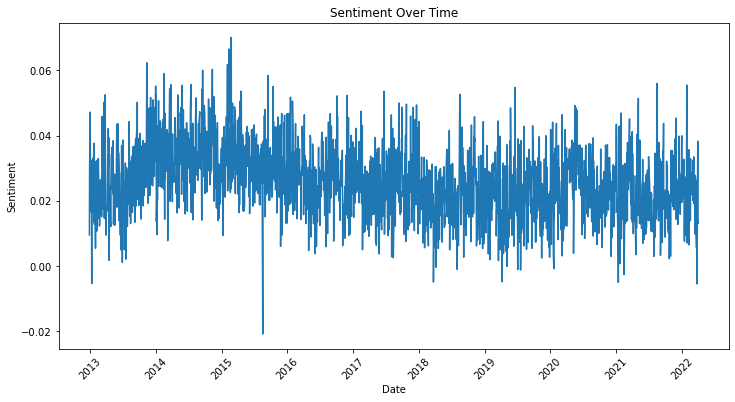

In [77]:
plt.figure(figsize=(12,6))
Date = final_data["date"].values
Sentiment = final_data["sentiment"].values

plt.plot(Date, Sentiment)
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.title("Sentiment Over Time")
plt.xticks(rotation=45)
plt.show()

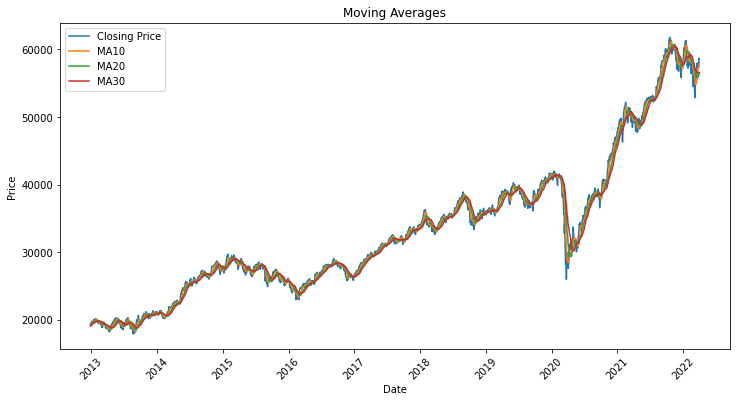

In [78]:
#plotting the moving Averages
plt.figure(figsize=(12, 6))
close_value = final_data["Close"].values
MA10 = final_data["M10"].values
MA20= final_data["M20"].values
MA30 = final_data["M30"].values
plt.plot(Date,close_value, label='Closing Price')
plt.plot(Date, MA10, label='MA10')
plt.plot(Date, MA20, label='MA20')
plt.plot(Date, MA30, label='MA30')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Moving Averages')
plt.legend()
plt.xticks(rotation=45)
plt.show()

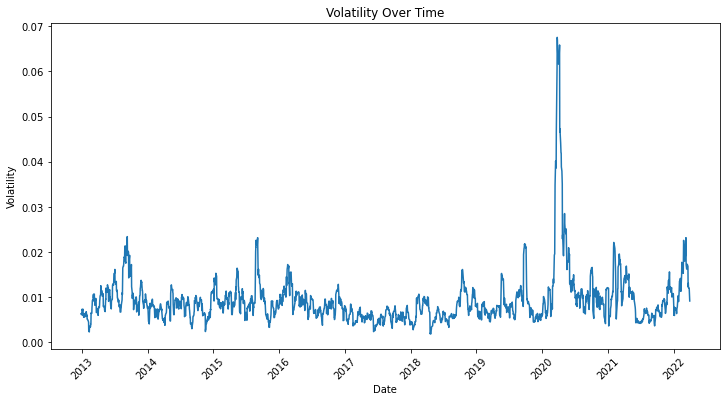

In [79]:
plt.figure(figsize=(12,6))
volatility=final_data["volatility"].values
plt.plot(Date,volatility)
plt.xlabel("Date")
plt.ylabel("Volatility")

plt.title("Volatility Over Time")
plt.xticks(rotation=45)
plt.show()

In [80]:
# creating training and test data
train_data=final_data.iloc[:len(final_data)-100]
test_data=final_data.iloc[len(final_data)-100:]

Feature scaling to normalise the features

In [81]:
scaler=MinMaxScaler()
numerical_features=["Open","High","Low","Volume","sentiment","M10","M20","M30","daily_return","volatility"]
train_data.loc[:,numerical_features]=scaler.fit_transform(train_data[numerical_features])
test_data.loc[:,numerical_features]=scaler.transform(test_data[numerical_features])

 using EXTREME GRADIENT BOOSTING REGRESSOR to predict the closing stock prices



In [84]:
xgb_regressor = xgb.XGBRegressor(random_state=0)
xgb_regressor.fit(train_data.loc[:,numerical_features],train_data["Close"])
test_data.loc[:,"predicted_close_price"]=xgb_regressor.predict(test_data.loc[:,numerical_features])

In [85]:
test_data

,date,Open,High,Low,Close,Adj Close,Volume,sentiment,M10,M20,M30,daily_return,volatility,predicted_close_price
2172,2021-11-08,0.960033,0.962933,0.958225,60545.609375,60545.609375,0.000233,0.618316,0.979763,1.001032,1.000532,0.630362,0.118997,59979.441406
2173,2021-11-09,0.965088,0.964322,0.968059,60433.449219,60433.449219,0.000192,0.492778,0.978519,1.001478,1.000842,0.586028,0.118334,59943.371094
2174,2021-11-10,0.957991,0.960607,0.962486,60352.820312,60352.820312,0.000233,0.603334,0.976195,1.001736,1.001063,0.588371,0.113317,59925.128906
2175,2021-11-11,0.957910,0.955777,0.955442,59919.691406,59919.691406,0.000192,0.429431,0.973344,1.001302,1.001266,0.561967,0.115702,59858.265625
2176,2021-11-12,0.956925,0.966140,0.963177,60686.691406,60686.691406,0.000214,0.544684,0.974980,1.001242,1.002291,0.652249,0.099606,60042.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2022-03-25,0.901710,0.900324,0.897582,57362.199219,57362.199219,0.000214,0.168260,0.903135,0.889235,0.910824,0.576080,0.154594,57549.957031
2268,2022-03-28,0.894284,0.895634,0.891354,57593.488281,57593.488281,0.000195,0.521379,0.907896,0.892880,0.909751,0.612622,0.154326,57627.355469
2269,2022-03-29,0.902004,0.903862,0.909786,57943.648438,57943.648438,0.000377,0.650025,0.911292,0.895360,0.909583,0.621877,0.141252,57958.015625
2270,2022-03-30,0.914375,0.920313,0.921934,58683.988281,58683.988281,0.000195,0.372054,0.918066,0.898259,0.911417,0.652142,0.126127,58940.480469


Model Evaluation:

In [86]:
mse= mean_squared_error(test_data["Close"],test_data["predicted_close_price"])
mae= mean_absolute_error(test_data["Close"],test_data["predicted_close_price"])
print("mean squared error:",np.sqrt(mse))
print("mean absolute error:",np.sqrt(mae))

mean squared error: 532.1098716208706
mean absolute error: 19.297860551755473


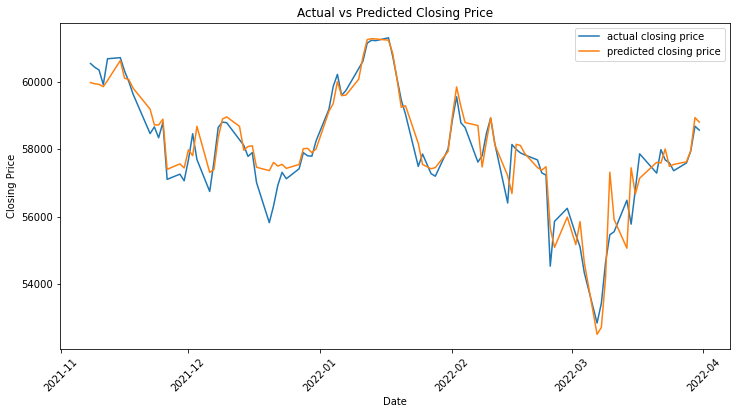

In [90]:
plt.figure(figsize=(12,6))
Date=test_data["date"].values
Close=test_data["Close"].values
pred=test_data["predicted_close_price"].values
plt.plot(Date,Close,label="actual closing price")
plt.plot(Date,pred,label="predicted closing price")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Actual vs Predicted Closing Price")
plt.legend()
plt.xticks(rotation=45)
plt.show()